# Main paper used for this Hybrid chaotic encryption algorithm
### https://doi.org/10.1007/978-3-319-77383-4_87

In [1]:
import tifffile
import numpy as np
from module import *
import time
import glob
from IPython.utils import io
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (28,6)

In [3]:
tifFile = "NDVI_Encrypted.tif"
tifFile

'LC08_L1TP_031032_20220209_20220222_02_T1_NDVI_adj_Filtered.tif'

In [4]:
ndviArray = tifffile.imread(tiffList[0])
ndviFlat = ndviArray.flatten()
rows, cols = ndviArray.shape
arrayLength = rows*cols

In [5]:
def Logistic(mu, x0):
    LogisticMap = np.full(arrayLength, np.nan)
    LogisticMap[0] = x0 
    for i in range(1, arrayLength):
        LogisticMap[i] = mu * LogisticMap[i-1]*(1-LogisticMap[i-1])
    return LogisticMap

def Chebyshev(k,x0):
    ChebyshevMap = np.full(arrayLength, np.nan)
    ChebyshevMap[0] = x0 
    for i in range(1, arrayLength):
        ChebyshevMap[i] = np.cos(k*np.arccos(ChebyshevMap[i-1]))
    return ChebyshevMap
    
def Hybrid(LogisticMap, ChebysehvMap):
    dotProd = LogisticMap * ChebysehvMap
    return dotProd

In [15]:
%%timeit
HashInt = hashKeyInt("ashish240")
hash_0to1 = Hash0to1(HashInt)

2.1 µs ± 5.47 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [16]:
%%timeit
# Convert hash to float in the range [3.5699456, 4.0]
# default & fixed range for this encryption to work.
float_mu = muFloatRange(hash_0to1)

#Starting seed value for X0 range[0,1]
xIniFloat = hash_0to1

# K >= 2 for chaotic state.
kFloat = kFloatRange(hash_0to1)

345 ns ± 1.83 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [17]:
%%timeit
LogisticMap = Logistic(float_mu, hash_0to1)
ChebyshevMap = Chebyshev(kFloat, hash_0to1)
HybridMap = Hybrid(LogisticMap, ChebyshevMap)
encryptedNDVI = np.full(arrayLength, np.nan)

1.18 s ± 5.42 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%%timeit
for i in range(0, arrayLength):
    float1 = ndviFlat[i]
    float2 = HybridMap[i]
    # Convert floats to 32-bit binary representations
    if np.isnan(float1):
        encryptedNDVI[i]=np.nan
        continue
    binary1 = int(bin(convert2Int(float1)),2)
    binary2 = int(bin(convert2Int(float2)),2)
    floatXor = binary1 ^ binary2
    encryptedNDVI[i] = convertBack(floatXor)

2.9 s ± 3.94 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


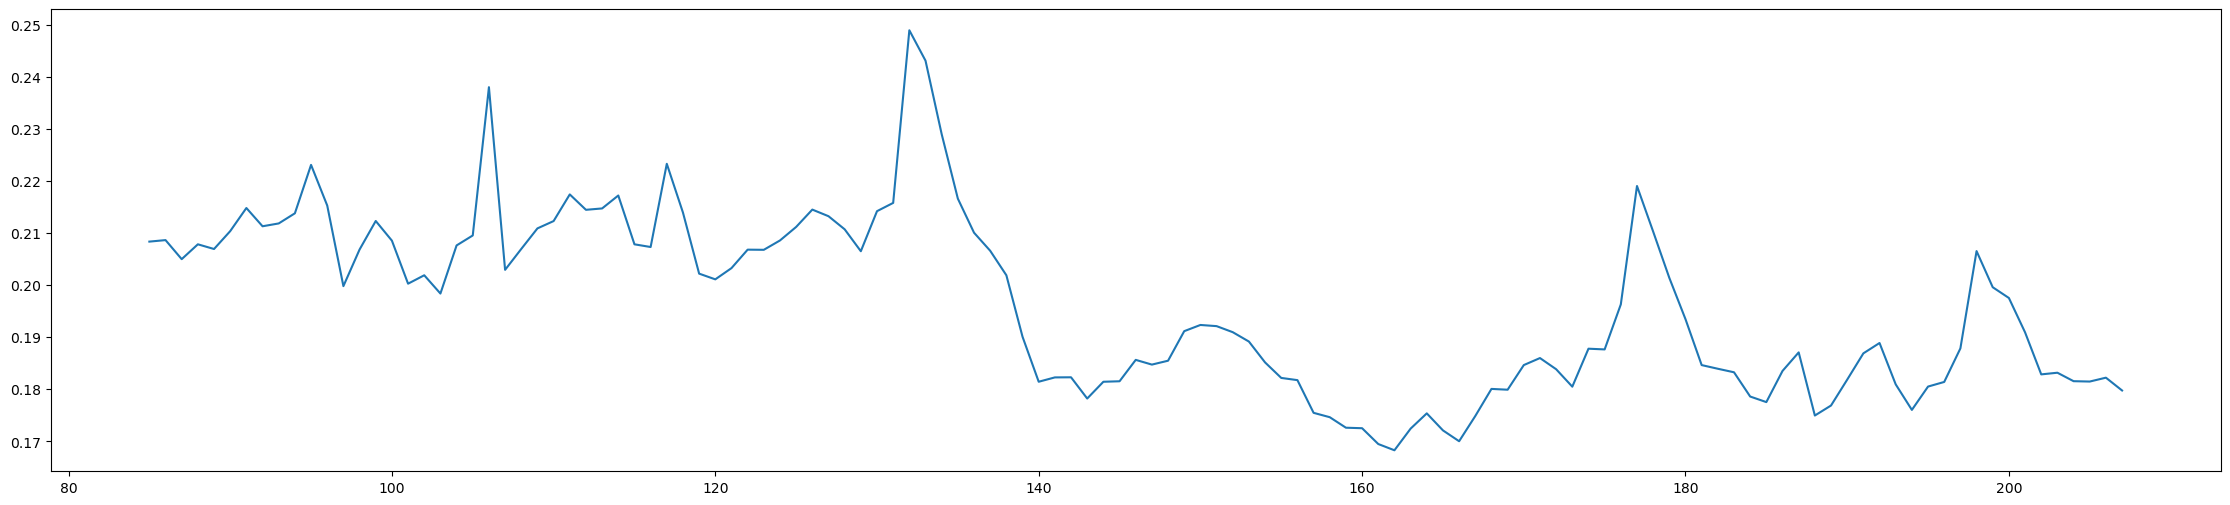

In [10]:
plt.plot(ndviFlat[6000:6500])
plt.savefig("NDVI_points.png")
# plt.close()

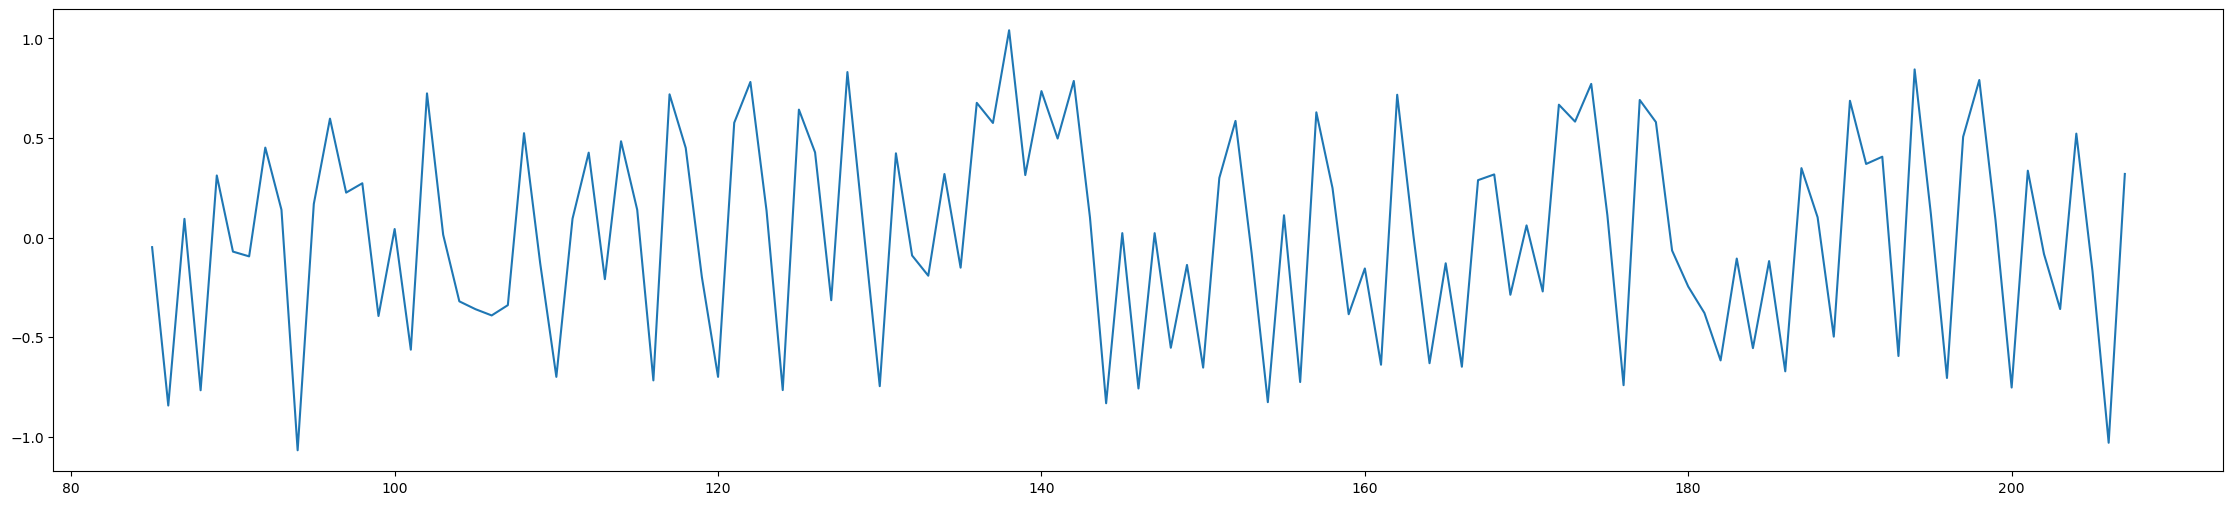

In [11]:
plt.plot(encryptedNDVI[6000:6500])
plt.savefig("NDVI_Encrypted_points.png")
# plt.close()

In [12]:
ndviEncryptedArray = encryptedNDVI.reshape(rows,cols)
tifffile.imwrite("NDVI_Encrypted.tif",ndviEncryptedArray)
tifffile.imwrite("NDVI_Original.tif",ndviArray)

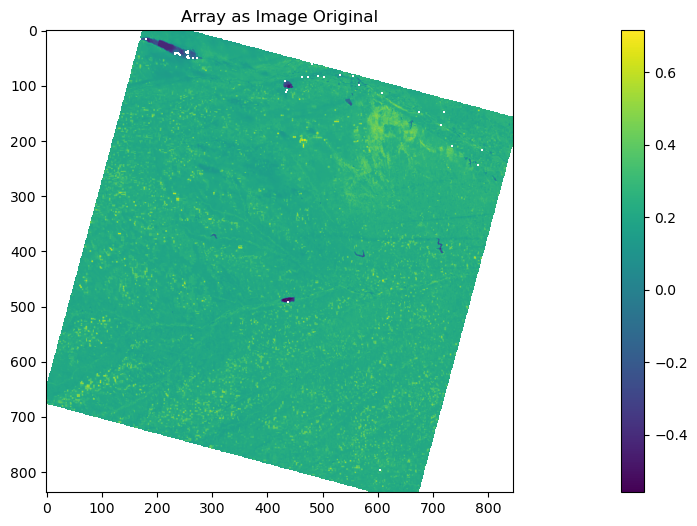

In [13]:
# Display the array as an image
plt.imshow(ndviArray, cmap='viridis')  # 'viridis' is just an example colormap, you can choose another
plt.title('Array as Image Original')
plt.colorbar()  # Add a colorbar for reference
plt.show()

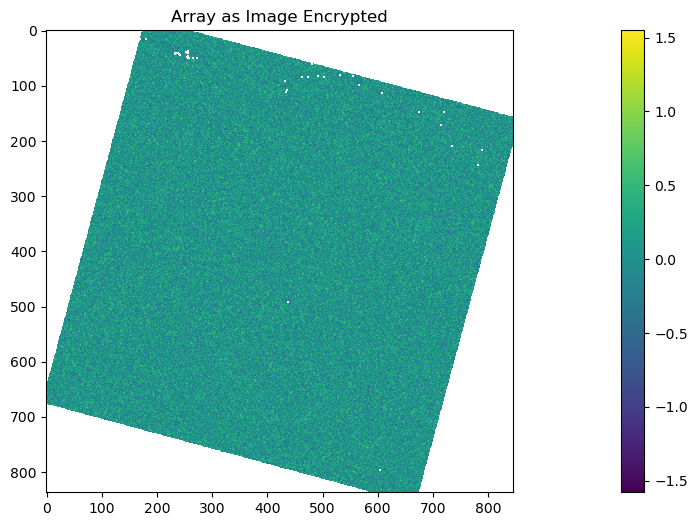

In [14]:
# Display the array as an image
plt.imshow(ndviEncryptedArray, cmap='viridis')  # 'viridis' is just an example colormap, you can choose another
plt.title('Array as Image Encrypted')
plt.colorbar()  # Add a colorbar for reference
plt.show()